In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs, get_labeledSamples_avgAcc_withBounds
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",10, 30, 0.01, "Adam",10])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
run_ids_smo

10


0    9ab696d7bdad462e9fc2434c7c34eac6
1    61ce16ab6d444df4a67961ad01e7c44e
2    5406131805f04c69b5135a9bdc83c8af
3    333ecd4379d34f2a88f6fd6537ed5eac
4    b95abd020b9f405ead4993c76b34e233
Name: run_id, dtype: object

In [3]:
runs_bp_smo_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "w_kmeans",10, 30, 0.01, "Adam",10])
print(len(runs_bp_smo_wkmeans))
run_ids_smo_wkmeans = get_run_ids(runs_bp_smo_wkmeans.head(5))
run_ids_smo_wkmeans

10


0    64c2eeb0d5944a5fbc25dc35d07a7e2c
1    8dac33075cdc4ec3979f560adef8e403
2    cdb1d7b0b4ef4dd8a5dd8cee78722f69
3    8d0903f555ef416d9370cf0f584a5eb1
4    36626a9e2ff049db84dd2bd2a029786a
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01, "Adam", 10])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

10


0    1a2600727c1e43dcb82d3cefbfd7be86
1    05fea9c5045c4fa2bf2d81f806409f66
2    49b86256ff714977aad2af91fcb7ced6
3    a9a4a4ebfdbf499cb6f1650c0dc35068
4    fc2b043eb7964c869fbe3505316cc12d
Name: run_id, dtype: object

In [5]:
runs_centroids_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "w_kmeans",1000, 30, 0.01, "Adam", 10])
print(len(runs_centroids_wkmeans))
run_ids_centroids_wkmeans = get_run_ids(runs_centroids_wkmeans.head(5))
run_ids_centroids_wkmeans

10


0    7030097050d94bb0ad8288f25ea843ef
1    06abfb1e7b5144c09b93e3bc1e49e3ac
2    f24fd5b0be31420593f78ab1d3c605bd
3    730a9cd1a2934c8bb2ede6240a515b4f
4    18a912a4411e40d4bf057a51f6217790
Name: run_id, dtype: object

In [6]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans",1000, 30, 0.01, 10, 10])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

10


0    31aee45508c2451181ee51ff382fc380
1    b2a53cdb36cb43d08414afae8e1e9af0
2    72080c75e1b0429da2a672ceadfc1f9f
3    8e519f1afaac4e5a86d8d01bb11cb5ec
4    e1f70922bdeb4168b55e7fd10287b35c
Name: run_id, dtype: object

In [7]:
runs_bp_clusterwise_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "w_kmeans",1000, 30, 0.01, 10, 10])
print(len(runs_bp_clusterwise_wkmeans))
run_ids_bp_clusterwise_wkmeans = get_run_ids(runs_bp_clusterwise_wkmeans.head(5))
run_ids_bp_clusterwise_wkmeans

10


0    ed84fe4bbe844ce1ad2ddacdfea4a0b2
1    5d91c2b465e74d2faab1d98655a9636e
2    448918e9a1ea4e8c82eb3c52e0f7db2f
3    22d8f8d1efb3415cb80b141364a34536
4    6a72301736c643549bf5cc7f21e5f8f1
Name: run_id, dtype: object

In [8]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "kmeans",1000, 0.01, 30, 10, 10])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

10


0    6d492158bc44478db0c26709d9729129
1    5633fb650d814bf6925497b45f3a688d
2    610708e0ba8c4ae6b68370c0480f901c
3    2a8e049e78e04d3b99523a627bc1fc8c
4    88a6fdb843f842e7b8be7f2ee35f3d51
Name: run_id, dtype: object

In [9]:
runs_boundary_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "w_kmeans",1000, 0.01, 30, 10, 10])
print(len(runs_boundary_wkmeans))
run_ids_boundary_wkmeans = get_run_ids(runs_boundary_wkmeans.head(5))
run_ids_boundary_wkmeans

10


0    42939bd9aea04d528f23d046992ea338
1    c4eeaa5e0b834a5591422280e69ef8c7
2    f3efbb7386054dc69ba14b7e7081f03d
3    199dcc95d8e0459d88737f5809c7539c
4    97277ea2c2a14c71a77bcfb7eab5d164
Name: run_id, dtype: object

In [10]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 10, "margin"])
print(len(runs_random_uncertainty))
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

10


0    865538aa565646b3b6a649ea376b56b9
1    6690062a6045491c8715d62e609b4ae6
2    dbe4915b08e34a8d8d24f3ae79ff434f
3    14b950db6017423aa76868e657952404
4    d87aa8aaa6264b2b9f74a8a884f6e2e3
Name: run_id, dtype: object

In [30]:
samples_labeled_bp_smo, avg_accs_bp_smo, lower_smo, upper_smo = get_labeledSamples_avgAcc_withBounds(run_ids_smo, tracking)
samples_labeled_bp_smo_wkmeans, avg_accs_bp_smo_wkmeans, lower_smo_wk, upper_smo_wk = get_labeledSamples_avgAcc_withBounds(run_ids_smo_wkmeans, tracking)

samples_labeled_centroids, avg_accs_centroids, lower_cent, upper_cent = get_labeledSamples_avgAcc_withBounds(run_ids_centroids, tracking)
samples_labeled_centroids_wkmeans, avg_accs_centroids_wkmeans, lower_cent_wk, upper_cent_wk = get_labeledSamples_avgAcc_withBounds(run_ids_centroids_wkmeans, tracking)

samples_labeled_clusterwise, avg_accs_clusterwise, lower_clust, upper_clust = get_labeledSamples_avgAcc_withBounds(run_ids_bp_clusterwise, tracking)
samples_labeled_clusterwise_wkmeans, avg_accs_clusterwise_wkmeans, lower_clust_wk, upper_clust_wk = get_labeledSamples_avgAcc_withBounds(run_ids_bp_clusterwise_wkmeans, tracking)

samples_labeled_boundary, avg_accs_boundary, lower_bp, upper_bp = get_labeledSamples_avgAcc_withBounds(run_ids_boundary, tracking)
samples_labeled_boundary_wkmeans, avg_accs_boundary_wkmeans, lower_bp_wk, upper_bp_wk = get_labeledSamples_avgAcc_withBounds(run_ids_boundary_wkmeans, tracking)

samples_labeled_random_uncertain, avg_accs_random_uncertain, lower_rc, upper_rc = get_labeledSamples_avgAcc_withBounds(run_ids_random_uncertainty, tracking)

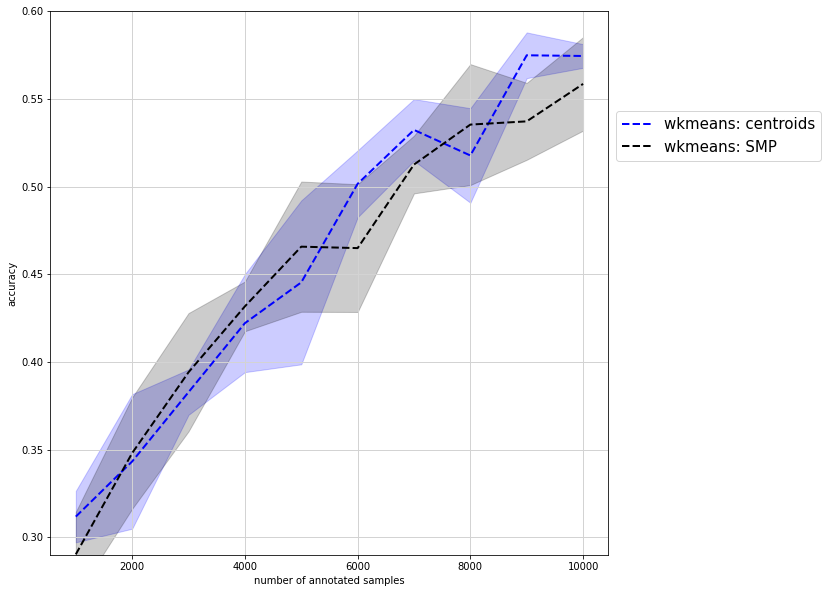

In [33]:
# plot
plt.figure( figsize=(10,10) )
#plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='kmeans: SMC', linewidth=2)
#plt.fill_between(samples_labeled_bp_smo, lower_smo, upper_smo, alpha=0.2, color='red')
#plt.plot(samples_labeled_bp_smo_wkmeans, avg_accs_bp_smo_wkmeans,color='red', label='wkmeans: SMC', linestyle='--', linewidth=2)
#plt.fill_between(samples_labeled_bp_smo_wkmeans, lower_smo_wk, upper_smo_wk, alpha=0.2, color='red')

#plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='kmeans: centroids', linewidth=2)
#plt.fill_between(samples_labeled_centroids, lower_cent, upper_cent, alpha=0.2, color='blue')
plt.plot(samples_labeled_centroids_wkmeans, avg_accs_centroids_wkmeans,color='blue', label='wkmeans: centroids', linestyle='--', linewidth=2)
plt.fill_between(samples_labeled_centroids_wkmeans, lower_cent_wk, upper_cent_wk, alpha=0.2, color='blue')

#plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='kmeans: WMC', linewidth=2)
#plt.fill_between(samples_labeled_clusterwise, lower_clust, upper_clust, alpha=0.2, color='magenta')
#plt.plot(samples_labeled_clusterwise_wkmeans, avg_accs_clusterwise_wkmeans,color='magenta', label='wkmeans: WMC', linestyle='--', linewidth=2)
#plt.fill_between(samples_labeled_clusterwise_wkmeans, lower_clust_wk, upper_clust_wk, alpha=0.2, color='magenta')

#plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='kmeans: SMP', linewidth=2)
#plt.fill_between(samples_labeled_boundary, lower_bp, upper_bp, alpha=0.2, color='black')
#plt.plot(samples_labeled_boundary_wkmeans, avg_accs_boundary_wkmeans,color='black', label='wkmeans: SMP', linestyle='--', linewidth=2)
#plt.fill_between(samples_labeled_boundary_wkmeans, lower_bp_wk, upper_bp_wk, alpha=0.2, color='black')

#plt.plot(samples_labeled_random_uncertain, avg_accs_random_uncertain,color='yellow', label='RC',linewidth=2)
#plt.fill_between(samples_labeled_random_uncertain, lower_rc, upper_rc, alpha=0.2, color='yellow')

plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])
plt.legend(bbox_to_anchor=(1,0.83), loc="upper left", prop={"size":15})
#plt.savefig('/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/figures/line_charts/beta10.png')
plt.show()